In [6]:
import pandas as pd
import numpy as np

datos = pd.read_csv('./Iris.csv')
for col in datos.select_dtypes(include='number').columns:
    print(f"Column: {col}")
    media = np.mean(datos[col])
    mediana = np.median(datos[col])
    desviacion_estandar = np.std(datos[col])
    print(f"Media: {media}")
    print(f"Mediana: {mediana}")
    print(f"Desviación estándar: {desviacion_estandar}")

Column: Id
Media: 75.5
Mediana: 75.5
Desviación estándar: 43.300307928081374
Column: SepalLengthCm
Media: 5.843333333333334
Mediana: 5.8
Desviación estándar: 0.8253012917851409
Column: SepalWidthCm
Media: 3.0540000000000003
Mediana: 3.0
Desviación estándar: 0.4321465800705435
Column: PetalLengthCm
Media: 3.758666666666666
Mediana: 4.35
Desviación estándar: 1.7585291834055212
Column: PetalWidthCm
Media: 1.1986666666666668
Mediana: 1.3
Desviación estándar: 0.7606126185881716


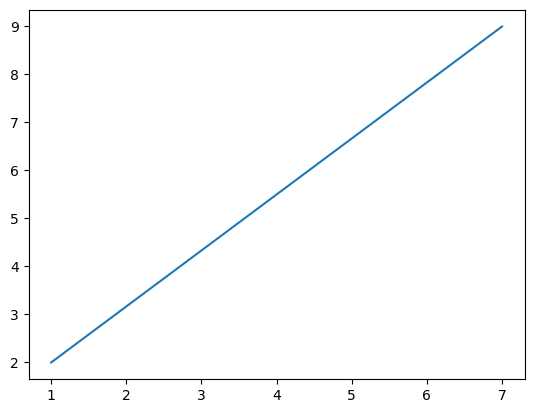

In [7]:
import matplotlib.pyplot as plt
xp = [1,7]
yp = [2,9]
plt.plot(xp, yp)
plt.show()

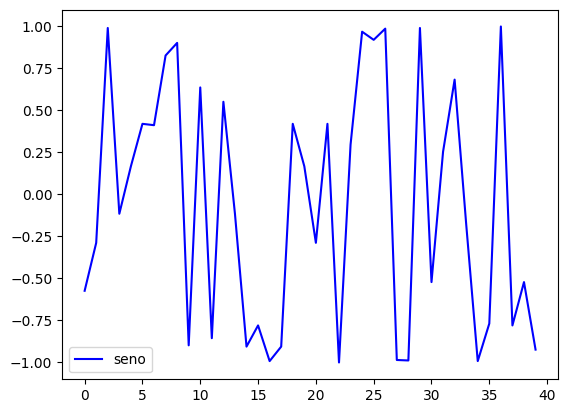

In [10]:
import random
valor = [random.randint(0, 100) for i in range(40)]
plt.plot(np.sin(valor), color='blue', label="seno")
plt.legend()
plt.show()

In [34]:
datos_cabello = pd.read_csv("./datos_cabello.csv")
cnt1 = datos_cabello[datos_cabello['cabello'].notna()].count()
cnt2 = datos_cabello.count()
print(f"hay {cnt1['edad']} con datos de cabello, sin incluir los NaN")
print(f"hay {cnt2['edad']} con datos de cabello") 


hay 26 con datos de cabello, sin incluir los NaN
hay 29 con datos de cabello


In [45]:
#scikit-learn v. 1.6.0

datos2 = [[10, 5, np.nan, 6, 7],[np.nan, 2, 9, 16, 13], [5, np.nan, 7, 10, 15], [np.nan, 12, 17, 7, 19]]
datos2 = np.array(datos2)
print(datos2)
print("-------------")
from sklearn.impute import SimpleImputer
pre_procesamiento = SimpleImputer(missing_values=np.nan, strategy="mean")
#pre_procesamiento2 = SimpleImputer(missing_values=np.nan, strategy="median")
datos_pre_procesados = pre_procesamiento.fit_transform(datos2)
#datos_pre_procesados2 = pre_procesamiento2.fit_transform(datos2)
print(datos_pre_procesados)
print("-------------")
#print(datos_pre_procesados2)


[[10.  5. nan  6.  7.]
 [nan  2.  9. 16. 13.]
 [ 5. nan  7. 10. 15.]
 [nan 12. 17.  7. 19.]]
-------------
[[10.          5.         11.          6.          7.        ]
 [ 7.5         2.          9.         16.         13.        ]
 [ 5.          6.33333333  7.         10.         15.        ]
 [ 7.5        12.         17.          7.         19.        ]]
-------------


In [ ]:
from sklearn.preprocessing import Normalizer
pre_procesamiento = Normalizer(norm="l2")
datos_normalizados = pre_procesamiento.fit_transform(datos_pre_procesados)
print(datos_normalizados)

[[0.54964971 0.27482485 0.60461468 0.32978983 0.3847548 ]
 [0.31517891 0.08404771 0.3782147  0.67238168 0.54631012]
 [0.23860679 0.30223526 0.3340495  0.47721357 0.71582036]
 [0.25010423 0.40016677 0.56690293 0.23343062 0.63359739]]


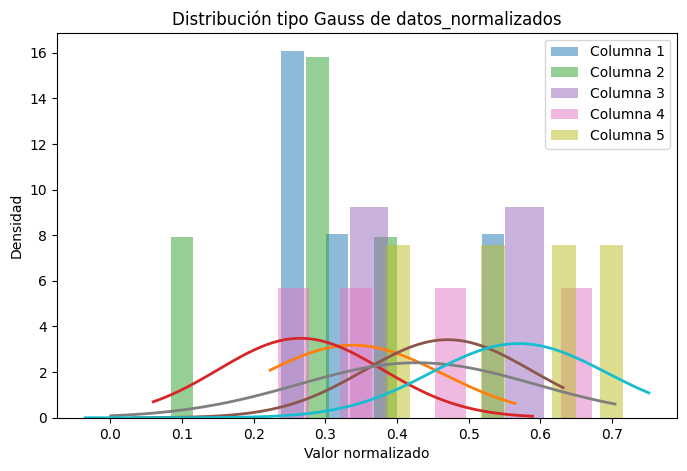

In [49]:
from scipy.stats import norm

# Graficar los datos normalizados como histogramas y ajustar una curva de Gauss

plt.figure(figsize=(8, 5))
for i in range(datos_normalizados.shape[1]):
    data = datos_normalizados[:, i]
    # Histograma
    plt.hist(data, bins=10, density=True, alpha=0.5, label=f'Columna {i+1}')
    # Ajuste de Gauss
    mu, std = norm.fit(data)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, linewidth=2)

plt.title('Distribución tipo Gauss de datos_normalizados')
plt.xlabel('Valor normalizado')
plt.ylabel('Densidad')
plt.legend()
plt.show()